<a href="https://colab.research.google.com/github/asepmuhidin/AI-B2/blob/main/GBFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jalur hasil GBFS: A -> G -> F -> H -> J


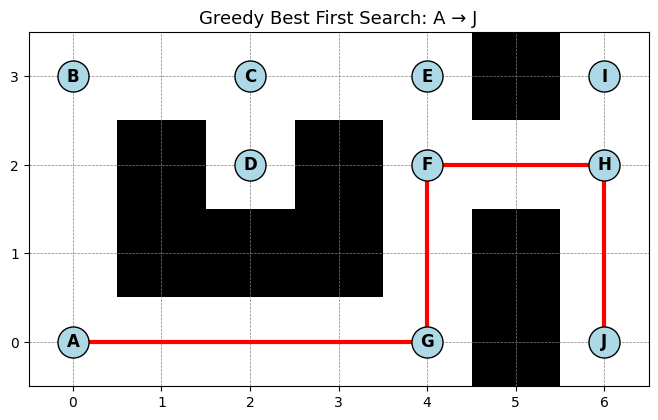

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import heapq

# === 1. Definisi grid dan obstacle ===
cols, rows = 7, 4
grid = np.zeros((rows, cols))
obstacles = [(1,1), (1,2), (2,1), (3,1), (3,2), (5,0),(5,1),(5,3)]
for (x, y) in obstacles:
    grid[y, x] = 1

# === 2. Node dan posisi koordinat (x, y) ===
nodes = {
    'A': (0,0), 'B': (0,3), 'C': (2,3), 'D': (2,2),
    'E': (4,3), 'F': (4,2), 'G': (4,0), 'H': (6,2),
    'I': (6,3), 'J': (6,0)
}

# === 3. Fungsi heuristik (Manhattan distance) ===
def heuristic(node, goal):
    (x1, y1) = nodes[node]
    (x2, y2) = nodes[goal]
    return abs(x1 - x2) + abs(y1 - y2)

# === 4. Representasi graph (hubungan antar node yang tidak menabrak obstacle) ===
graph = {
    'A': ['G'],
    'B': ['C'],
    'C': ['D', 'E'],
    'D': ['F'],
    'E': ['F', 'I'],
    'F': ['H'],
    'G': ['F'],
    'H': ['J'],
    'I': ['H'],
    'J': []
}

# === 5. Implementasi Greedy Best First Search ===
def greedy_best_first_search(graph, start, goal):
    open_list = []
    heapq.heappush(open_list, (heuristic(start, goal), start))
    came_from = {start: None}
    visited = set()

    while open_list:
        _, current = heapq.heappop(open_list)
        visited.add(current)

        if current == goal:
            break

        for neighbor in graph[current]:
            if neighbor not in visited:
                came_from[neighbor] = current
                heapq.heappush(open_list, (heuristic(neighbor, goal), neighbor))

    # Rekonstruksi jalur
    path = []
    node = goal
    while node is not None:
        path.append(node)
        node = came_from.get(node)
    path.reverse()
    return path

# === 6. Jalankan pencarian ===
start, goal = 'A', 'J'
path = greedy_best_first_search(graph, start, goal)
print("Jalur hasil GBFS:", " -> ".join(path))

# === 7. Visualisasi hasil ===
plt.figure(figsize=(8,5))
plt.imshow(grid, cmap='Greys', origin='upper')

# Gambar node
for n, (x, y) in nodes.items():
    plt.scatter(x, y, s=500, c='lightblue', edgecolors='black', zorder=3)
    plt.text(x, y, n, ha='center', va='center', fontsize=12, fontweight='bold')

# Gambar jalur hasil GBFS (warna merah)
for i in range(len(path)-1):
    x1, y1 = nodes[path[i]]
    x2, y2 = nodes[path[i+1]]
    plt.plot([x1, x2], [y1, y2], 'r-', linewidth=3, zorder=2)

# Gridlines dan info tambahan
plt.xticks(range(cols))
plt.yticks(range(rows))
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.title(f"Greedy Best First Search: {start} → {goal}", fontsize=13)
plt.gca().invert_yaxis()
plt.show()
